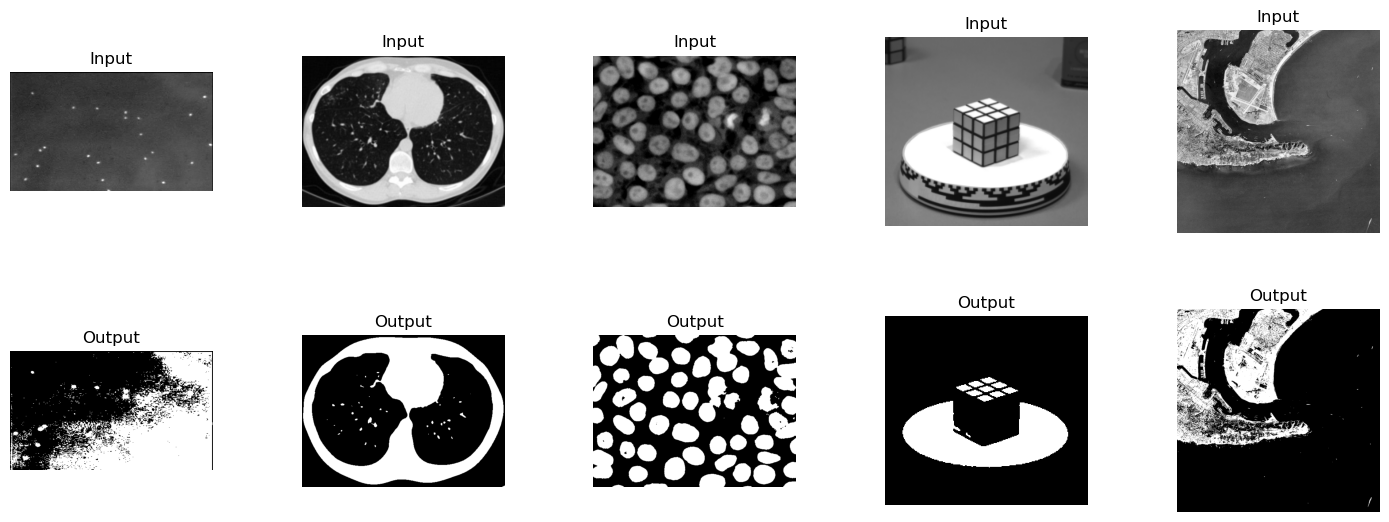

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 15-16
def otsu_threshold(image):
    # image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # histogram of image
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist.flatten()
    
    total = gray.shape[0] * gray.shape[1]
    s_total = 0
    s_bg = 0
    w_total = 0
    max_var = 0
    o_threshold = 0
    
    for t in range(256):
        w_bg = np.sum(hist[:t]) / total
        w_fg = 1 - w_bg
        
        if w_bg > 0 and w_fg > 0:
            s_bg = 0
            for x in range(t):
                s_bg += x * hist[x]
                
            s_total = 0
            for x in range(256):
                s_total += x * hist[x]
            
            mean_bg = s_bg / (w_bg * total)
            mean_fg = (s_total - s_bg) / (w_fg * total)
            
            var = w_bg * w_fg * (mean_bg - mean_fg) ** 2
            
            if var > max_var:
                max_var = var
                o_threshold = t
        
#         if t % 50 == 0:
#             for _ in range(3):
#                 if t < 100:
#                     print("less < 100")
#                 else:
#                     print("greater >= 100")
    
    binary = gray > o_threshold
    binary = binary.astype(np.uint8) * 255
    
    return binary

# input image
input_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
inputs = [cv2.imread(path) for path in input_paths]
outputs = [otsu_threshold(image) for image in inputs]

fig, axs = plt.subplots(2, len(inputs), figsize=(15, 6))
fig.tight_layout(pad=3.0)

# Output display
for i, (input_img, output_img) in enumerate(zip(inputs, outputs)):
    axs[0, i].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(output_img, cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.show()


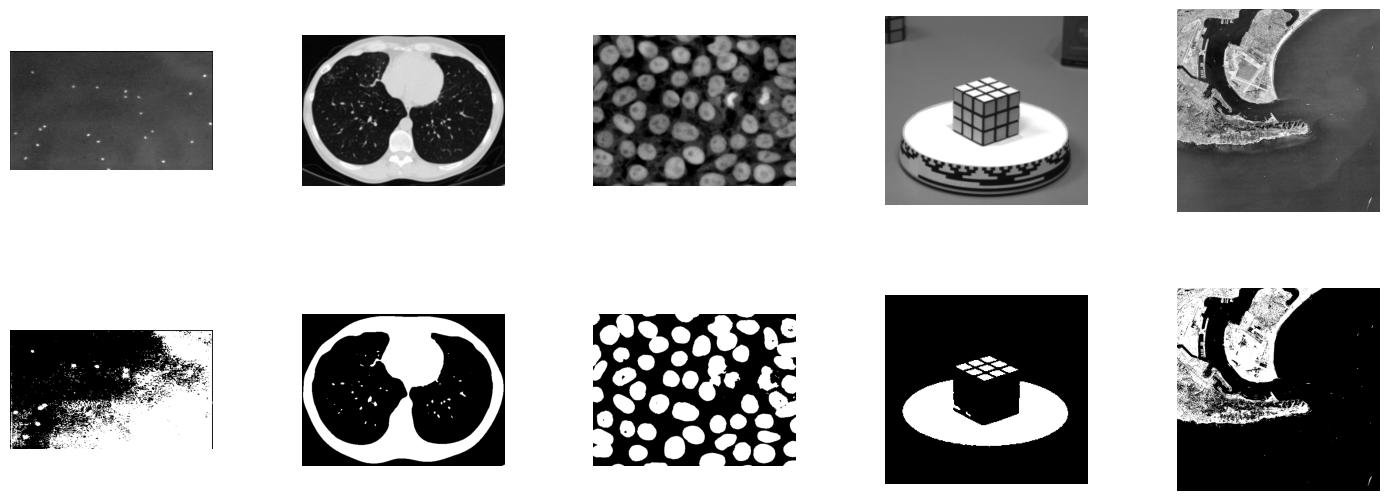

In [22]:
# Q1

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def otsu_threshold(image):
#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Compute the histogram of the grayscale image
#     hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
#     # Total number of pixels
#     total_pixels = gray_image.shape[0] * gray_image.shape[1]
    
#     # Initialize variables
#     sum_total = 0
#     sum_background = 0
#     weight_total = 0
#     max_variance = 0
#     optimal_threshold = 0
    
#     # Iterate over all possible threshold values
#     for threshold in range(256):
#         weight_background = 0
#         weight_foreground = 0
#         sum_background = 0
#         sum_total = 0
        
#         # Calculate the weights and sums for each class
#         for i in range(threshold):
#             weight_background += hist[i][0] / total_pixels
#             sum_background += i * hist[i][0]
        
#         for i in range(256):
#             weight_total += hist[i][0] / total_pixels
#             sum_total += i * hist[i][0]
        
#         weight_foreground = 1 - weight_background
        
#         # Check if the weights are valid
#         if weight_background == 0 or weight_foreground == 0:
#             continue
        
#         mean_background = sum_background / (weight_background * total_pixels)
#         mean_foreground = (sum_total - sum_background) / (weight_foreground * total_pixels)
        
#         # Compute the between-class variance
#         variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        
#         # Update the maximum variance and optimal threshold if necessary
#         if variance > max_variance:
#             max_variance = variance
#             optimal_threshold = threshold
    
#     # Apply the optimal threshold to create a binary image
#     _, binary_image = cv2.threshold(gray_image, optimal_threshold, 255, cv2.THRESH_BINARY)
    
#     return binary_image

# # Load the input images
# image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
# images = []
# for path in image_paths:
#     images.append(cv2.imread(path))

# # Perform Otsu thresholding on each image
# binary_images = []
# for image in images:
#     binary_images.append(otsu_threshold(image))

# # Display the results
# fig, axs = plt.subplots(2, len(images), figsize=(15, 6))
# for i, image in enumerate(images):
#     axs[0, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     axs[0, i].axis('off')
#     axs[1, i].imshow(binary_images[i], cmap='gray')
#     axs[1, i].axis('off')

# plt.show()

import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the histogram of the grayscale image
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    hist = hist.flatten()
    
    # Total number of pixels
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    
    # Initialize variables
    sum_total = 0
    sum_background = 0
    weight_total = 0
    max_variance = 0
    optimal_threshold = 0
    
    # Iterate over all possible threshold values
    for threshold in range(256):
        weight_background = np.sum(hist[:threshold]) / total_pixels
        weight_foreground = 1 - weight_background
        
        # Check if the weights are valid
        if weight_background == 0 or weight_foreground == 0:
            continue
        
        sum_background = np.sum(np.arange(threshold) * hist[:threshold])
        sum_total = np.sum(np.arange(256) * hist)
        
        mean_background = sum_background / (weight_background * total_pixels)
        mean_foreground = (sum_total - sum_background) / (weight_foreground * total_pixels)
        
        # Compute the between-class variance
        variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        
        # Update the maximum variance and optimal threshold if necessary
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = threshold
    
    # Apply the optimal threshold to create a binary image
    binary_image = gray_image > optimal_threshold
    binary_image = binary_image.astype(np.uint8) * 255
    
    return binary_image

# Load the input images
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
images = [cv2.imread(path) for path in image_paths]

# Perform Otsu thresholding on each image
binary_images = [otsu_threshold(image) for image in images]

# Display the results
fig, axs = plt.subplots(2, len(images), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i in range(len(images)):
    axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axs[0, i].axis('off')
    axs[1, i].imshow(binary_images[i], cmap='gray')
    axs[1, i].axis('off')

plt.show()


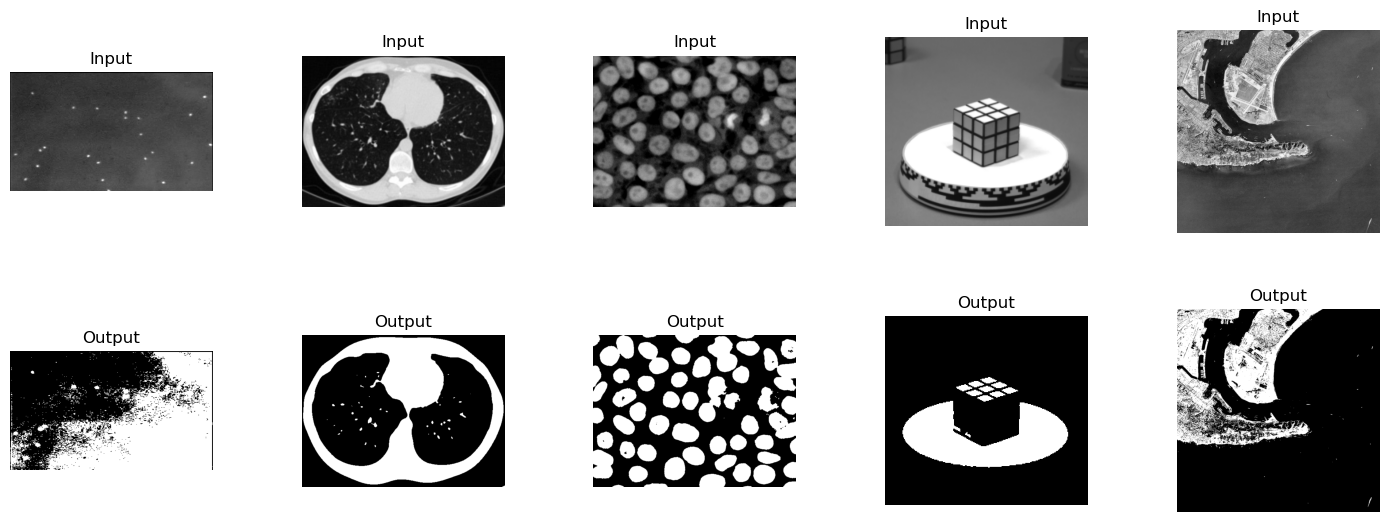

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 17-18
def isodata_threshold(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize the threshold with a random value
    threshold = np.random.randint(0, 256)

    while True:
        # Split the image into two classes based on the threshold
        class1 = grayscale_image[grayscale_image <= threshold]
        class2 = grayscale_image[grayscale_image > threshold]

        # Calculate the means of the two classes
        mean1 = np.mean(class1)
        mean2 = np.mean(class2)

        # Calculate the new threshold as the mean of the two means
        new_threshold = int((mean1 + mean2) / 2)

        # Check for convergence
        if new_threshold == threshold:
            break

        threshold = new_threshold

    # Apply the final threshold to create a binary image
    binary_image = np.zeros_like(grayscale_image, dtype=np.uint8)
    binary_image[grayscale_image <= threshold] = 0
    binary_image[grayscale_image > threshold] = 255

    return binary_image

# Load the input images
input_image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
input_images = [cv2.imread(path) for path in input_image_paths]

# Perform Isodata thresholding on each image
output_binary_images = [isodata_threshold(image) for image in input_images]

# Display the results
fig, axs = plt.subplots(2, len(input_images), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i, (input_image, output_binary_image) in enumerate(zip(input_images, output_binary_images)):
    axs[0, i].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(output_binary_image, cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.show()


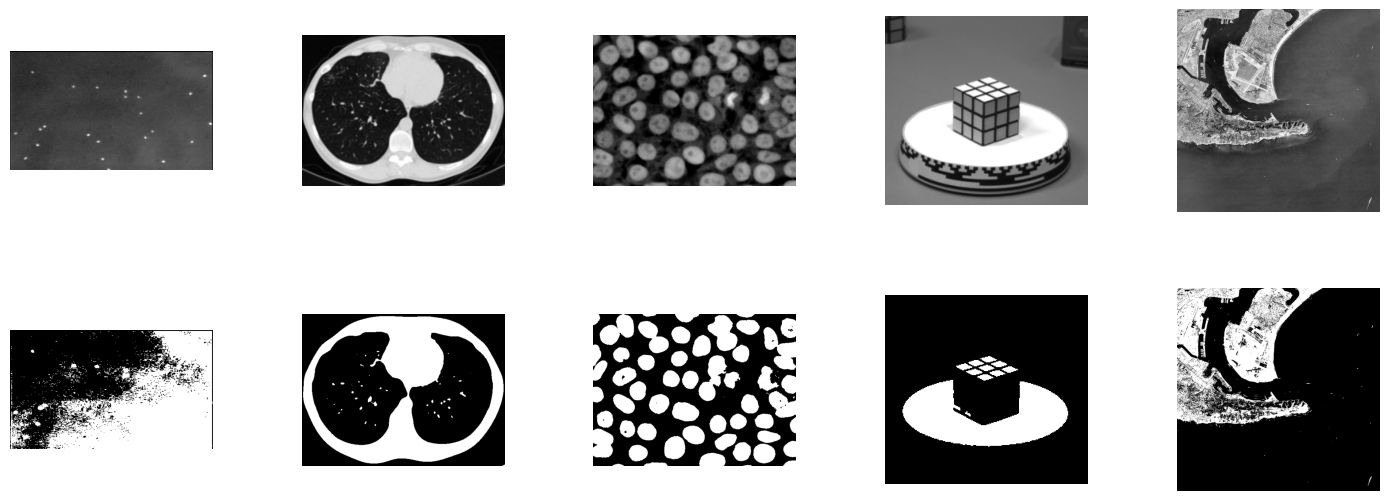

In [41]:
# Q2

import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata_threshold(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize the threshold with a random value
    threshold = np.random.randint(0, 256)

    while True:
        # Split the image into two classes based on the threshold
        class1 = gray_image[gray_image <= threshold]
        class2 = gray_image[gray_image > threshold]

        # Calculate the means of the two classes
        mean1 = np.mean(class1)
        mean2 = np.mean(class2)

        # Calculate the new threshold as the mean of the two means
        new_threshold = int((mean1 + mean2) / 2)

        # Check for convergence
        if new_threshold == threshold:
            break

        threshold = new_threshold

    # Apply the final threshold to create a binary image
    binary_image = gray_image.copy()
    binary_image[binary_image <= threshold] = 0
    binary_image[binary_image > threshold] = 255

    return binary_image.astype(np.uint8)

# Load the input images
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
images = [cv2.imread(path) for path in image_paths]

# Perform Isodata thresholding on each image
binary_images = [isodata_threshold(image) for image in images]

# Display the results
fig, axs = plt.subplots(2, len(images), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i in range(len(images)):
    axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axs[0, i].axis('off')
    axs[1, i].imshow(binary_images[i], cmap='gray')
    axs[1, i].axis('off')

plt.show()


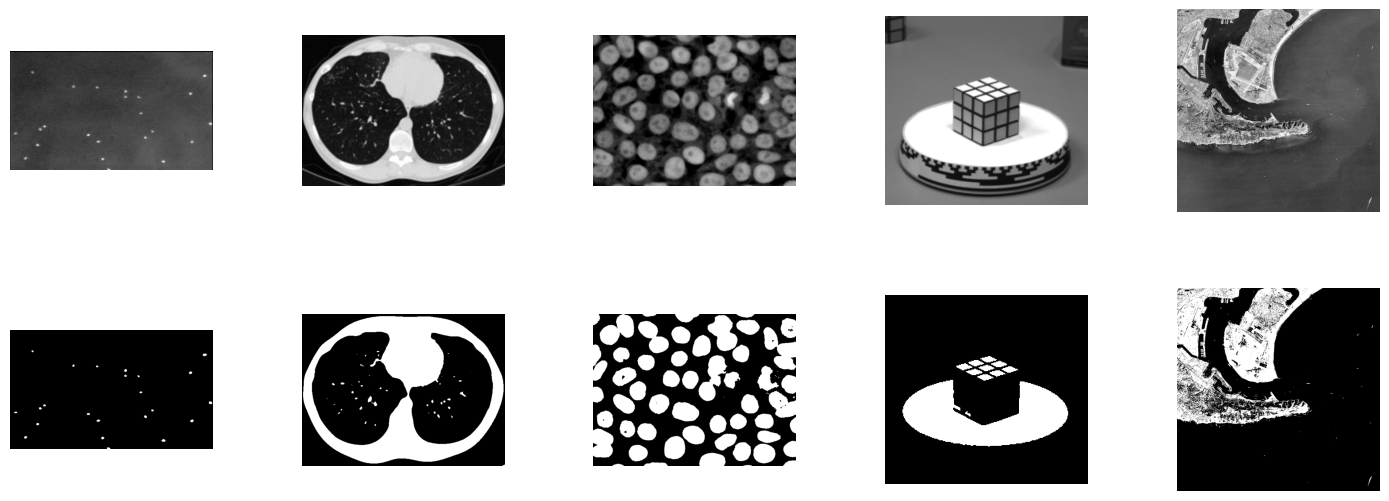

In [42]:
# Q2

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def isodata_threshold(image):
#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Initialize the threshold with a random value
#     threshold = np.random.randint(0, 256)

#     while True:
#         # Split the image into two classes based on the threshold
#         class1 = gray_image[gray_image <= threshold]
#         class2 = gray_image[gray_image > threshold]

#         # Calculate the means of the two classes
#         mean1 = np.mean(class1)
#         mean2 = np.mean(class2)

#         # Calculate the new threshold as the mean of the two means
#         new_threshold = int((mean1 + mean2) / 2)

#         # Check for convergence
#         if new_threshold == threshold:
#             break

#         threshold = new_threshold

#     # Apply the final threshold to create a binary image
#     _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

#     return binary_image

# # Load the input images
# image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
# images = [cv2.imread(path) for path in image_paths]

# # Perform Isodata thresholding on each image
# binary_images = [isodata_threshold(image) for image in images]

# # Display the results
# fig, axs = plt.subplots(2, len(images), figsize=(15, 6))
# fig.tight_layout(pad=3.0)

# for i in range(len(images)):
#     axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
#     axs[0, i].axis('off')
#     axs[1, i].imshow(binary_images[i], cmap='gray')
#     axs[1, i].axis('off')

# plt.show()

# Q2

import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata_threshold(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize the threshold with a random value
    threshold = np.random.randint(0, 256)

    while True:
        # Split the image into two classes based on the threshold
        class1 = gray_image[gray_image <= threshold]
        class2 = gray_image[gray_image > threshold]

        # Calculate the means of the two classes
        mean1 = np.mean(class1)
        mean2 = np.mean(class2)

        # Calculate the new threshold as the mean of the two means
        new_threshold = int((mean1 + mean2) / 2)

        # Check for convergence
        if new_threshold == threshold:
            break

        threshold = new_threshold

    # Apply the final threshold to create a binary image
    binary_image = gray_image.copy()
    binary_image[binary_image <= threshold] = 0
    binary_image[binary_image > threshold] = 255

    return binary_image.astype(np.uint8)

# Load the input images
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
images = [cv2.imread(path) for path in image_paths]

# Perform Isodata thresholding on each image
binary_images = [isodata_threshold(image) for image in images]

# Display the results
fig, axs = plt.subplots(2, len(images), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i in range(len(images)):
    axs[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axs[0, i].axis('off')
    axs[1, i].imshow(binary_images[i], cmap='gray')
    axs[1, i].axis('off')

plt.show()



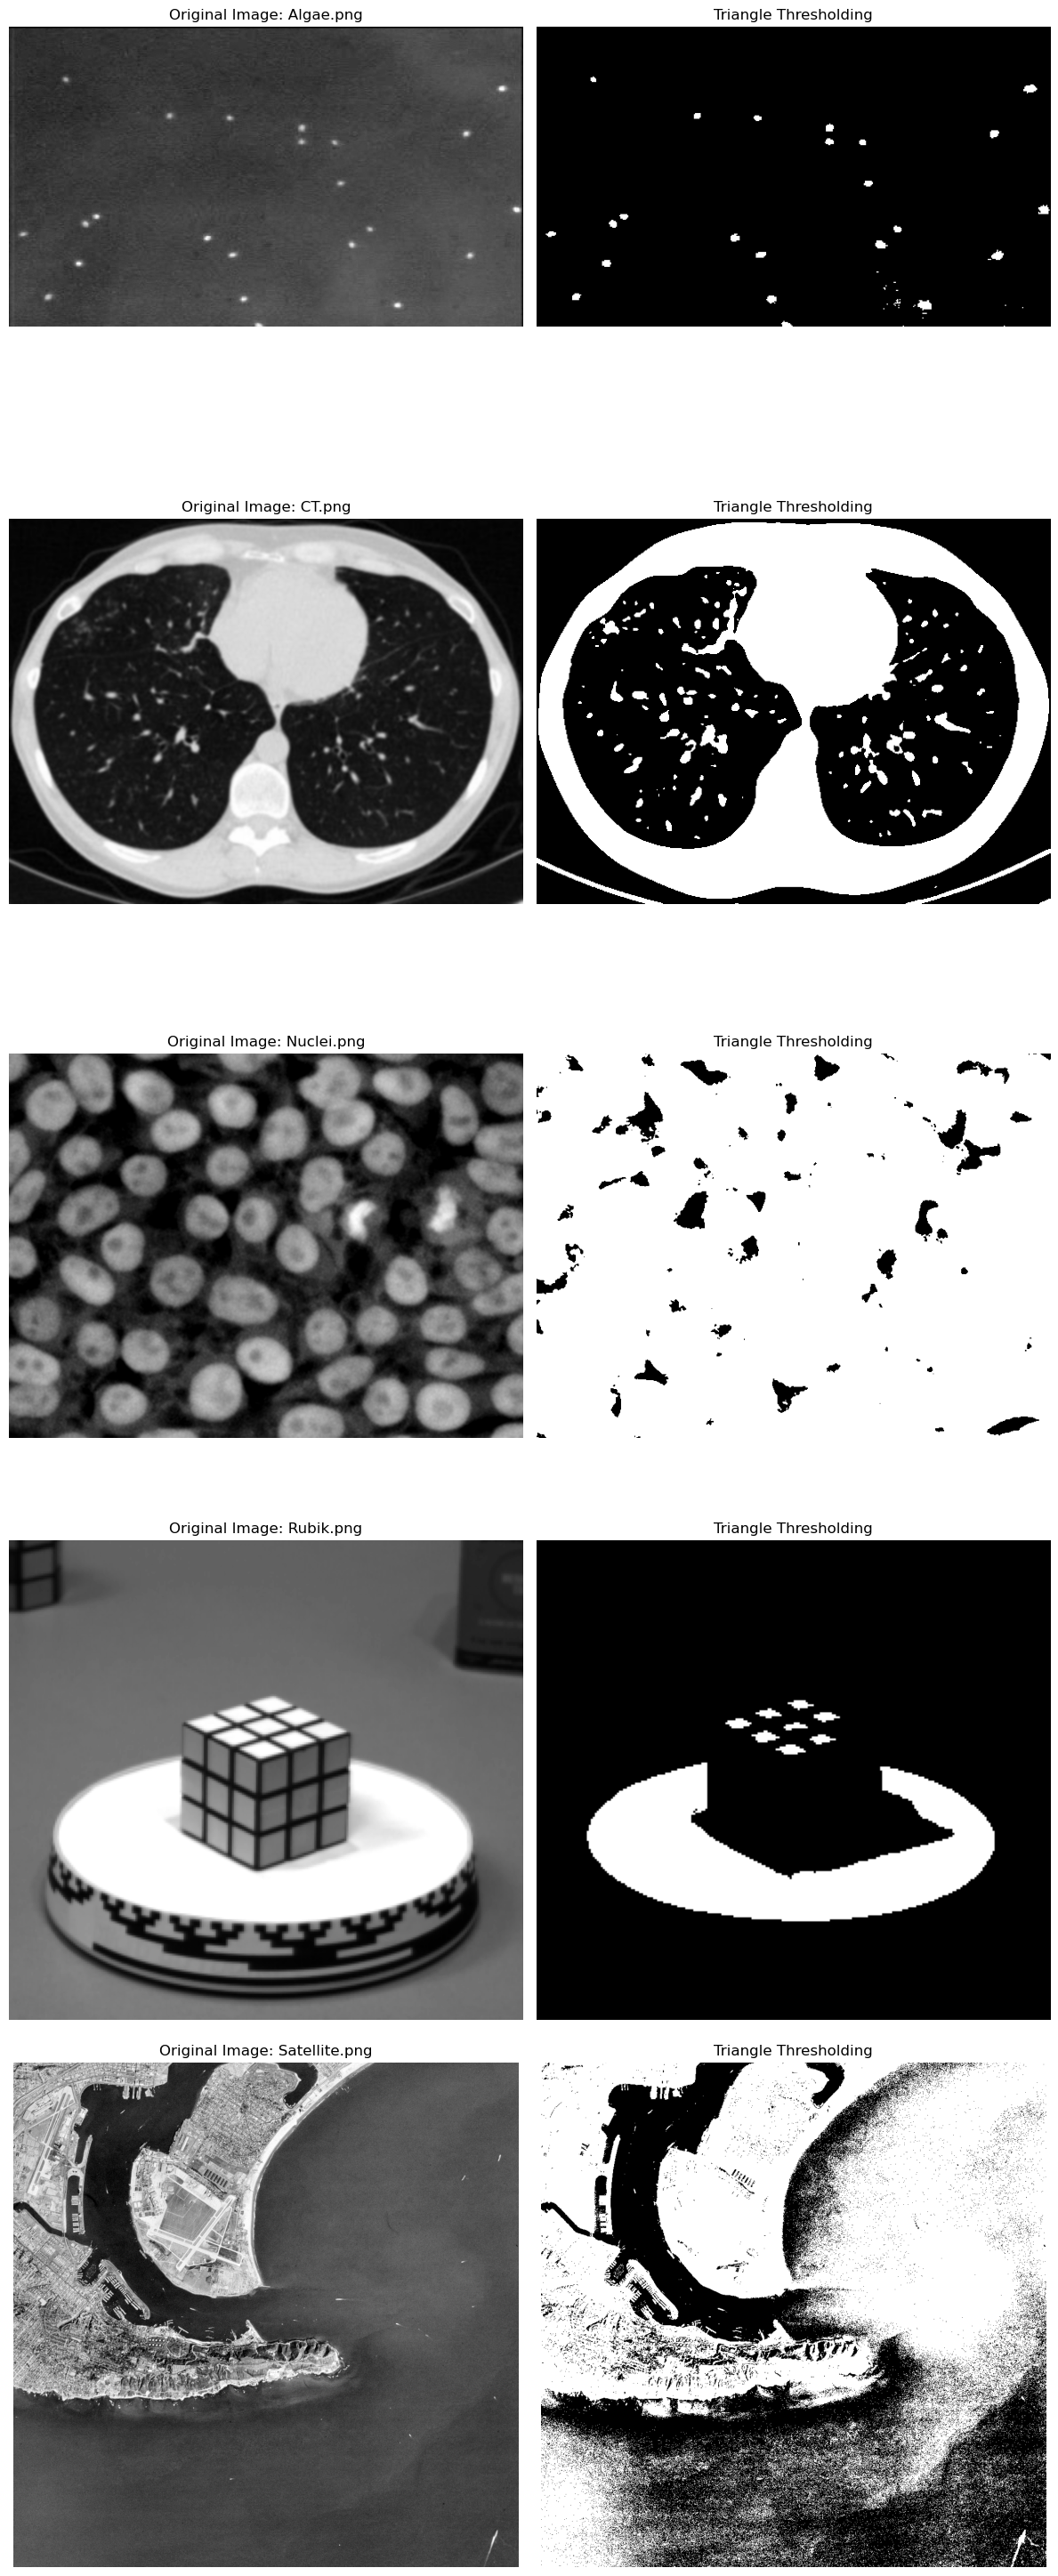

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def triangle_threshold(image):
    shape1, shape2 = image.shape

    count = [0] * 256
    min1 = -150
    min2 = -150
    
    for i in range(shape1):
        for j in range(shape2):
            pixval = image[i, j]
            count[pixval] += 1

    i = 0
    while i != 256:
        if count[i] > 0:
            min1 = i
            break
        i += 1

    j = 255
    while j != -1:
        if count[j] > 0:
            min2 = j
            break
        j -= 1

    if min2 < 255:
        min2 += 1
    
    if min1 > 0:
        min1 -= 1

    maximum = count.index(max(count))

    val1 = maximum - min1
    val2 = maximum - min2

    inversion = False
    rightval = -val2

    if val1 <= rightval:
        inversion = True
        min1, maximum = 255 - min2, 255 - maximum
        count.reverse()

    temp1 = count[maximum] * min1
    temp2 = (maximum - min1) * count[min1]

    threshold = 0 
    ans = -1000

    for i in range(min1 + 1, maximum + 1):
        t1 = count[maximum] * i
        t2 = (maximum - min1) * count[i]
        dist = t1 - t2 - (temp1 - temp2)
        if dist > ans:
            ans, threshold = dist, i

    if inversion:
        threshold = 255 - threshold

    return threshold

# Load the image
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
num_images = len(image_paths)

fig, axs = plt.subplots(num_images, 2, figsize=(12, 6 * num_images))

for i, image_path in enumerate(image_paths):
    # Read the image as grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Perform triangle thresholding
    threshold = triangle_threshold(image)
    thresholded_image = np.where(image > threshold, 255, 0)

    # Display the original and thresholded images
    axs[i, 0].imshow(image, cmap='gray')
    axs[i, 0].set_title('Original Image: {}'.format(image_path))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(thresholded_image, cmap='gray')
    axs[i, 1].set_title('Triangle Thresholding')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


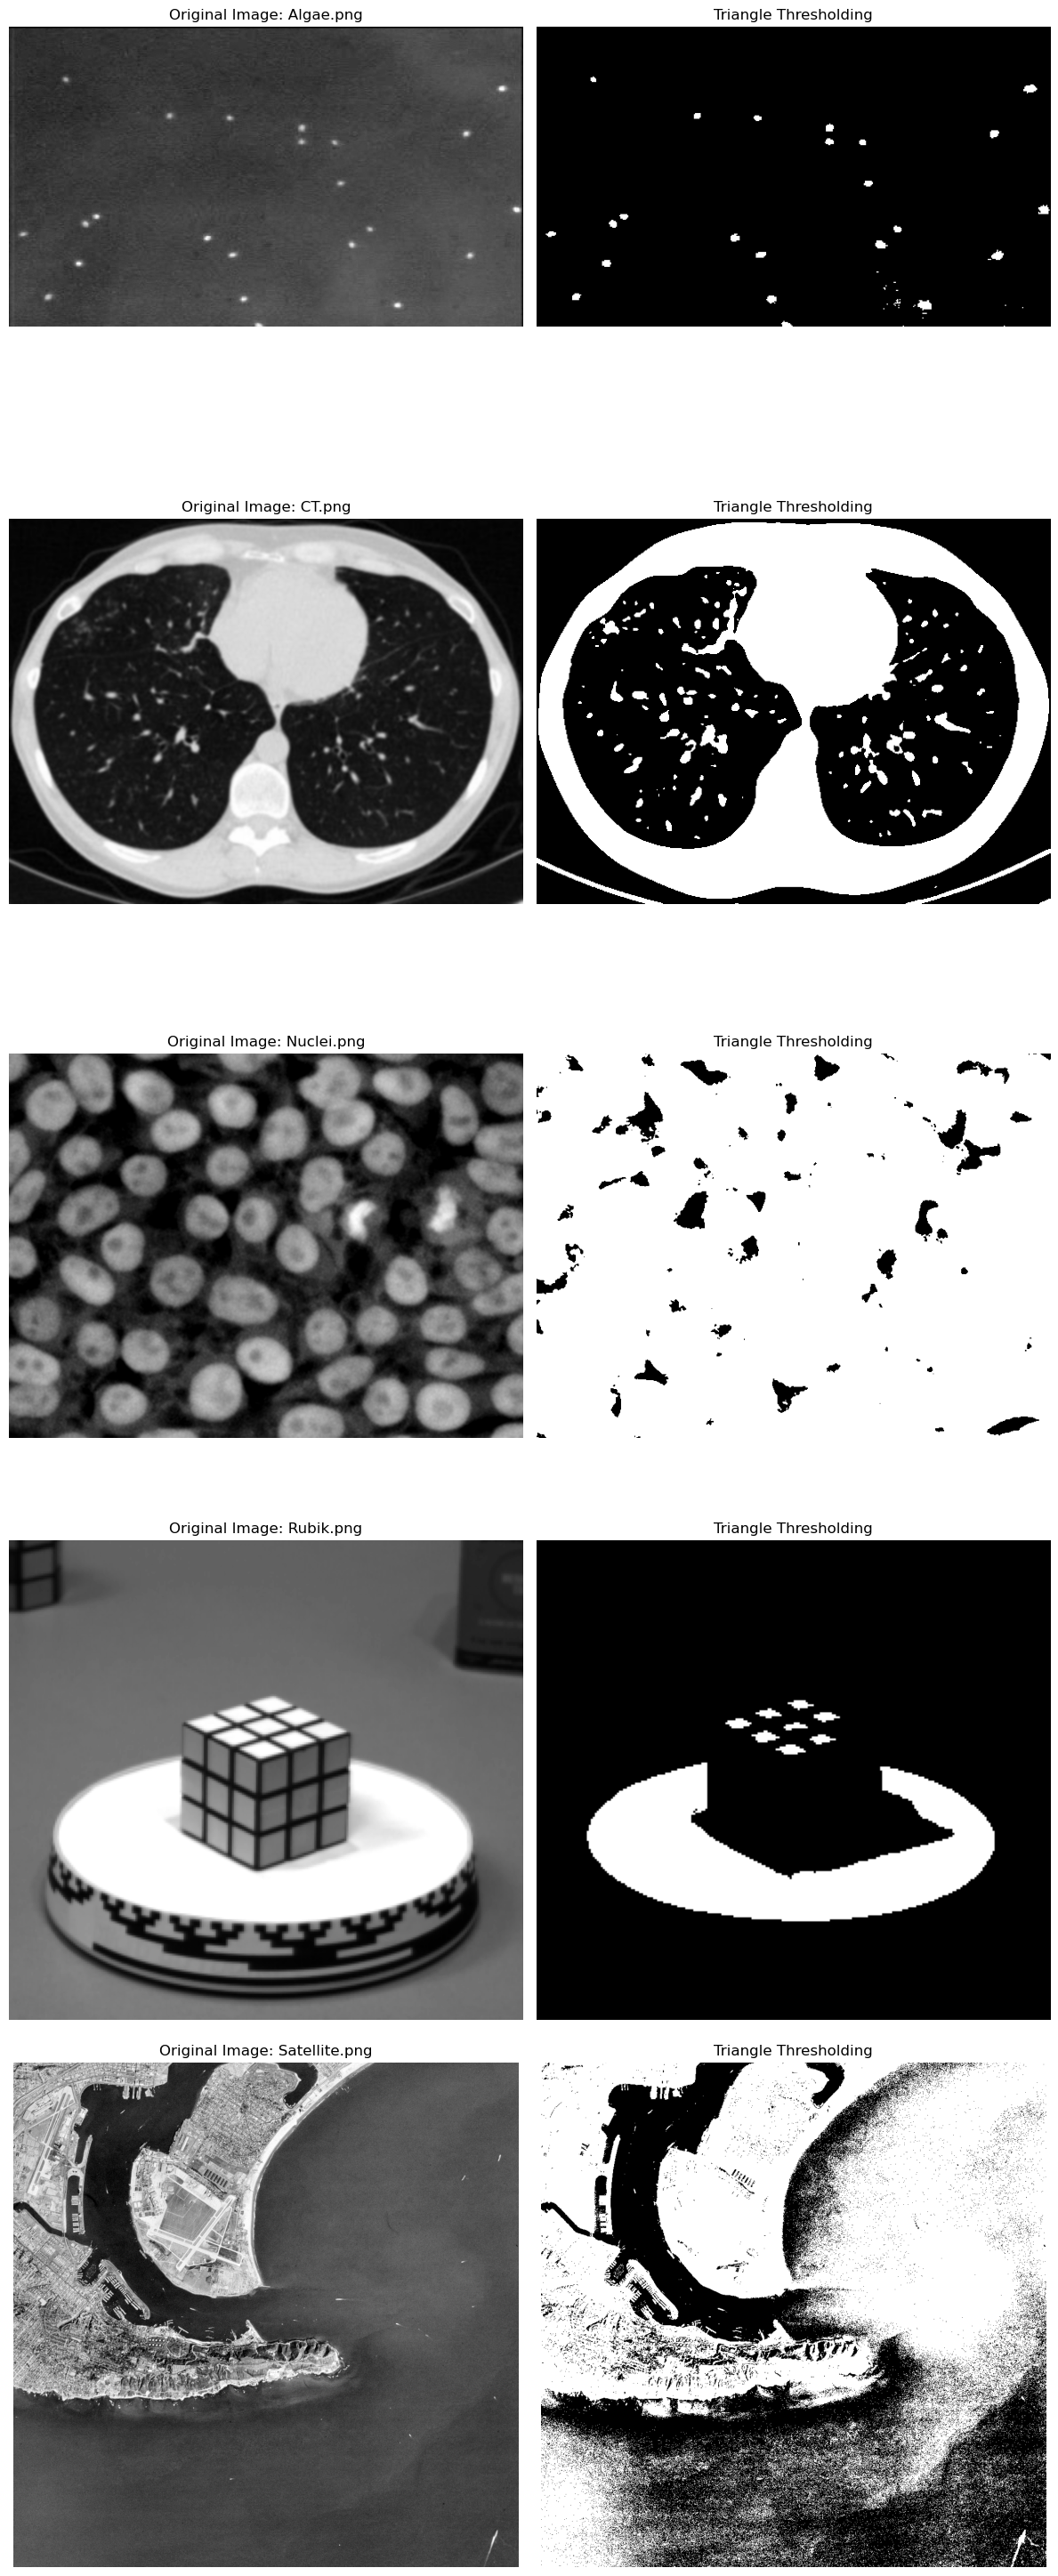

In [17]:
# Q3

import cv2
import numpy as np
import matplotlib.pyplot as plt

def triangle_threshold(image):
    shape1, shape2 = image.shape

    count = [0] * 256
    min1 = -150
    min2 = -150
    
    for i, j in np.ndindex(image.shape):
        pixval = image[i, j]
        count[pixval] += 1

    for i in range(256):
        if count[i] > 0:
            min1 = i
            break

    for j in range(255, -1, -1):
        if count[j] > 0:
            min2 = j
            break

    min2 = min(min2 + 1, 255)
    min1 = max(min1 - 1, 0)

    maximum = count.index(max(count))

    val1 = maximum - min1
    val2 = maximum - min2

    inversion = False
    rightval = -val2

    if val1 <= rightval:
        inversion = True
        min1, maximum = 255 - min2, 255 - maximum
        count.reverse()

    temp1 = count[maximum] * min1
    temp2 = (maximum - min1) * count[min1]

    threshold = 0 
    ans = -1000

    threshold_candidates = range(min1 + 1, maximum + 1)
    dist_values = [count[maximum] * i - (maximum - min1) * count[i] - (temp1 - temp2) for i in threshold_candidates]
    max_dist_index = np.argmax(dist_values)
    threshold = threshold_candidates[max_dist_index]

    if inversion:
        threshold = 255 - threshold

    return threshold

# Load the image
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
num_images = len(image_paths)

fig, axs = plt.subplots(num_images, 2, figsize=(12, 6 * num_images))

for i, image_path in enumerate(image_paths):
    # Read the image as grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Perform triangle thresholding
    threshold = triangle_threshold(image)
    thresholded_image = np.where(image > threshold, 255, 0)

    # Display the original and thresholded images
    axs[i, 0].imshow(image, cmap='gray')
    axs[i, 0].set_title('Original Image: {}'.format(image_path))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(thresholded_image, cmap='gray')
    axs[i, 1].set_title('Triangle Thresholding')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


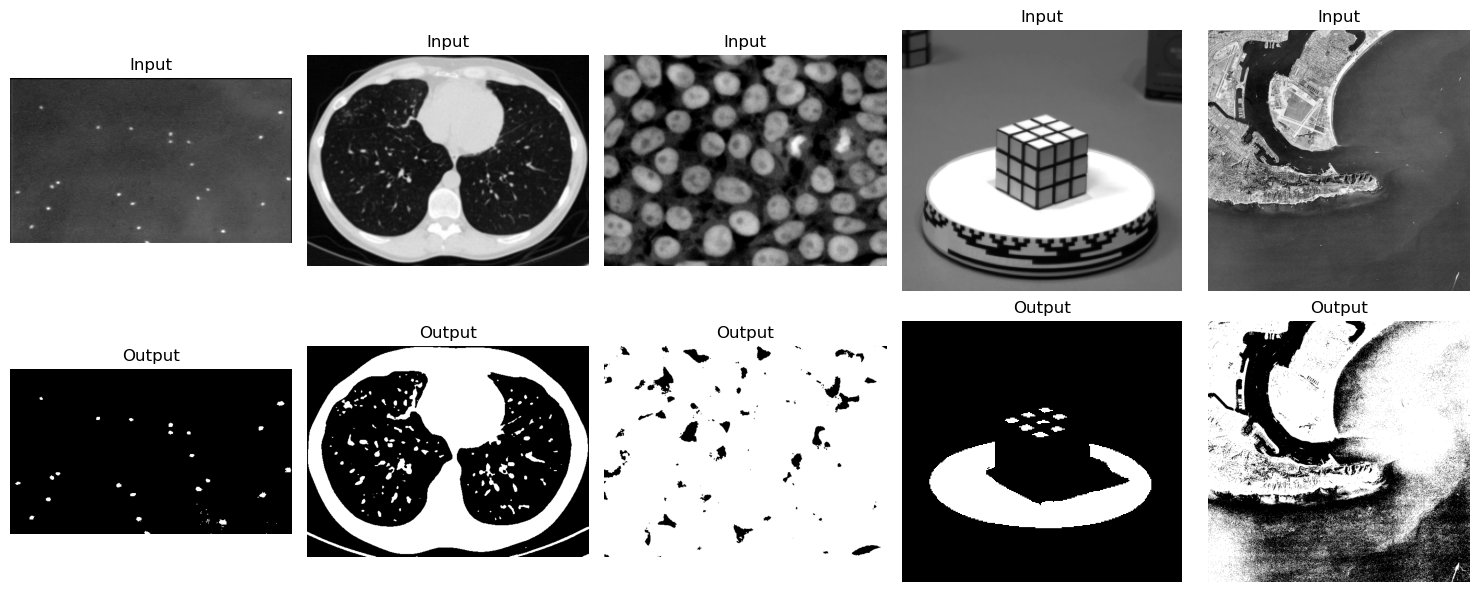

In [35]:
# Q3

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 30
def triangle_threshold(image):
    shape1, shape2 = image.shape

    count = [0] * 256
    min1 = -200
    min2 = -200
    
    for i, j in np.ndindex(image.shape):
        pixval = image[i, j]
        count[pixval] += 1

    min1 = next(i for i in range(256) if count[i] > 0)
    min2 = next(j for j in range(255, -1, -1) if count[j] > 0)

    
    min2 = min(min2 + 1, 255)
    min1 = max(min1 - 1, 0)

    maximum = count.index(max(count))

    val1, val2 = maximum - min1, maximum - min2

    inversion = False
    rightval = -val2

    if val1 <= rightval:
        inversion = True
        min1, maximum = 255 - min2, 255 - maximum
        count.reverse()

    temp1, temp2 = count[maximum] * min1, (maximum - min1) * count[min1]

    threshold = 0 
    ans = -1000

    threshold_candidates = range(min1 + 1, maximum + 1)
    dist_values = [count[maximum] * i - (maximum - min1) * count[i] - (temp1 - temp2) for i in threshold_candidates]
    max_dist_index = np.argmax(dist_values)
    threshold = threshold_candidates[max_dist_index]

    if inversion:
        threshold = 255 - threshold

    return threshold

# Load the image
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
inputs = [cv2.imread(path, cv2.COLOR_BGR2GRAY) for path in image_paths]

outputs_triangle = [triangle_threshold(image) for image in inputs]
# fig, axs = plt.subplots(len(inputs), 2, figsize=(12, 6 * len(inputs)))
fig, axs = plt.subplots(2, len(inputs), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i, (image, output) in enumerate(zip(inputs, outputs_triangle)):
    axs[0, i].imshow(image, cmap='gray')
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(np.where(image > output, 255, 0), cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Q3

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 30
def triangle_threshold(image):
    shape1, shape2 = image.shape

    count = [0] * 256
    min1 = -200
    min2 = -200
    
    for i, j in np.ndindex(image.shape):
        pixval = image[i, j]
        count[pixval] += 1

    for i in range(256):
        if count[i] > 0:
            min1 = i
            break

    for j in range(255, -1, -1):
        if count[j] > 0:
            min2 = j
            break

    min2 = min(min2 + 1, 255)
    min1 = max(min1 - 1, 0)

    maximum = count.index(max(count))

    val1,val2 = maximum - min1, maximum - min2

    inversion = False
    rightval = -val2

    if val1 <= rightval:
        inversion = True
        min1, maximum = 255 - min2, 255 - maximum
        count.reverse()

    temp1, temp2 = count[maximum] * min1, (maximum - min1) * count[min1]

    threshold = 0 
    ans = -1000

    threshold_candidates = range(min1 + 1, maximum + 1)
    dist_values = [count[maximum] * i - (maximum - min1) * count[i] - (temp1 - temp2) for i in threshold_candidates]
    max_dist_index = np.argmax(dist_values)
    threshold = threshold_candidates[max_dist_index]

    if inversion:
        threshold = 255 - threshold

    return threshold

# Load the image
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
inputs = [cv2.imread(path, cv2.COLOR_BGR2GRAY) for path in image_paths]

outputs_triangle = [triangle_threshold(image) for image in inputs]
# fig, axs = plt.subplots(len(inputs), 2, figsize=(12, 6 * len(inputs)))
fig, axs = plt.subplots(2, len(inputs), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i, (image, output) in enumerate(zip(inputs, outputs_triangle)):
    axs[0, i].imshow(image, cmap='gray')
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(np.where(image > output, 255, 0), cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()